# Projeto 2 - Ciência dos Dados

# Contribuidores: 

Layne Pereira da Silva

Lidia Alves Chagas Domingos

# Objetivo do projeto
 O principal objetivo do Projeto 2 da disciplina é prever uma variável principal em função de demais outras variáveis 
que podem influenciar em seu comportamento. Para conhecimento, a tabela abaixo mostra como 
essas variáveis são nomeadas nas áreas de ciência dos dados e estatística.


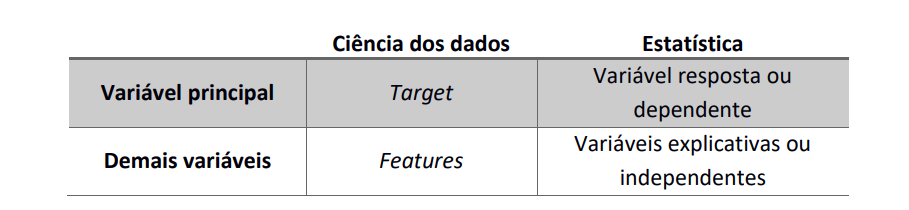
                                       FONTE: documento de aula

 
 O tema foi proposto pelos contribuidores, assim como a busca por uma base de dados que permita 
        responder alguns interesses levantados no tema escolhido. 
    O tema procura deixar claro uma pergunta e o objetivo contempla:

    • Prever um rótulo (nesse caso, o target é qualitativo e trata-se de uma classificação). Por exemplo, 
        considerando uma playlist de uma pessoa, Spotify deve ou não recomendar uma nova música a 
        essa pessoa.
    
    • Prever uma informação numérica (nesse caso, o target é quantitativo). Por exemplo, 
        considerando as algumas características de imóveis de uma determinada região, uma corretora 
        de imóveis deve prever o valor de um novo imóvel que será lançado nessa região

# Introdução 

### Contexto real do tema "câncer de mama"

- O que é câncer de mama?

    "*Câncer de mama é o tipo de câncer mais comum entre as mulheres no mundo e no Brasil, depois do câncer de pele não melanoma. O câncer de mama responde, atualmente, por cerca de 28% dos casos novos de câncer em mulheres. O câncer de mama também acomete homens, porém é raro, representando menos de 1% do total de casos da doença. Relativamente raro antes dos 35 anos, acima desta idade sua incidência cresce progressivamente, especialmente após os 50 anos. Estatísticas indicam aumento da sua incidência tanto nos países desenvolvidos quanto nos em desenvolvimento. Existem vários tipos de câncer de mama. Alguns evoluem de forma rápida, outros, não. A maioria dos casos tem bom prognóstico. Para o ano de 2018, foram estimados 59.700 novos casos de câncer de mama no Brasil.* 


- Quais sintomas do câncer de mama?

    *O sintoma mais comum de câncer de mama é o aparecimento de nódulo, geralmente indolor, duro e irregular, mas há tumores que são de consistência branda, globosos e bem definidos. Outros sinais de câncer de mama são:*


 - edema cutâneo (na pele), semelhante à casca de laranja;
 - retração cutânea;
 - dor;
 - inversão do mamilo;
 - hiperemia;
 - descamação ou ulceração do mamilo;
 - secreção papilar, especialmente quando é unilateral e espontânea.

    *A secreção associada ao câncer geralmente é transparente, podendo ser rosada ou avermelhada devido à presença de glóbulos vermelhos. Podem também surgir linfonodos palpáveis na axila. A postura atenta das mulheres em relação à saúde das mamas, que significa conhecer o que é normal em seu corpo e quais as alterações consideradas suspeitas de câncer de mama, é fundamental para a detecção precoce dessa doença.*


    *Sinais e sintomas devem sempre ser investigados, pois podem estar relacionados a doenças benignas ou malignas da mama.*
    
 - Tumor benigno
 
    *Tem células que crescem lentamente e semelhante às do tecido normal. Na maioria dos casos pode ser totalmente removido (e o paciente curado) por meio de cirurgia.*

- Tumor maligno

    *As células multiplicam-se rapidamente e têm a capacidade de “invadir” estruturas próximas ao local de origem. A cura neste tipo de tumor depende do diagnóstico precoce e do tratamento adotado.
    A classificação entre tumores benignos e malignos é feita com base em três pontos principais, que são:*

- A aparência;
- A estrutura, e
- O comportamento reprodutivo das células atingidas."¹²



### Descrição do tema e perguntas propostas

    Com base nas informações apresentadas no *contexto real* do tema escolhido e explorado, uma das hipóteses a ser explorada, ou se não, uma das perguntas principais que procura-se responder, é se pelos parâmetros de textura, perímetro, área, por exemplo, é possível classificar se um determinado câncer de mama é maligno ou benigno. Para isso, será necessário fazer uma análise exploratória completa em uma base de dados (dataset escolhido) e conseguir informações suficientes para poder prever possíveis resultados com a hipótese levantada. 
    
    Nesse sentido, o projeto apresentado abaixo é um Classificador Categórico, sendo o target qualitativo e as features quantitativas.

# Minerando Dados e características do dataset e bibliotecas escolhidos 


### Carregando bibliotecas utilizadas:

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree

### Diretório utilizado:

In [7]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\layneps\Desktop\Insper\CDados\projeto 2\projeto2-cdados


### Carregando a base de dados e visualizando 5 primeiros termos:


In [8]:
filename = 'dados_cancer.csv'

In [9]:
dados = pd.read_csv(filename)
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Análise Exploratória

In [10]:
dados.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<p> Primeiro, é excluído os valores da coluna 'id' e 'Unnamed:32', a primeira devido ao número de identificação do paciente não ser importante para definir se o cancer é benigno ou maligno, e o segundo por conter apenas valores númericos indefinidos, também não importantes para a montagem do modelo e observação da base de dados. </p>

In [11]:
dados = pd.read_csv(filename) #colocado aqui apenas para não dar erro caso rodar essa célula de novo
del dados['Unnamed: 32']
del dados['id']
dados_limpos = dados

In [12]:
# observando se tem valores únicos
dados_limpos.nunique(axis=0)

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [13]:
dados_limpos.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
#Frequências relativas
dados_limpos.diagnosis.value_counts(True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

## Visualizando correlação entre variáveis do grupo "B" e "M" (benigno e maligno, respectivamente)

De forma a conseguir visualizar melhor a relação entre os valores encontrados de cada coluna, foi usada a função seaborn.pairplot nas células abaixo. 

_"By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column."¹°_

Resumidamente, esse comando do python mostra graficamente cada variável dos dados compartilhada no eixo y através de uma única linha e no eixo x através de uma única coluna. Isso cria um mapeamento mais visual dos dados. Como existem 30 colunas, para melhor visualização foram colocados em 6 células:


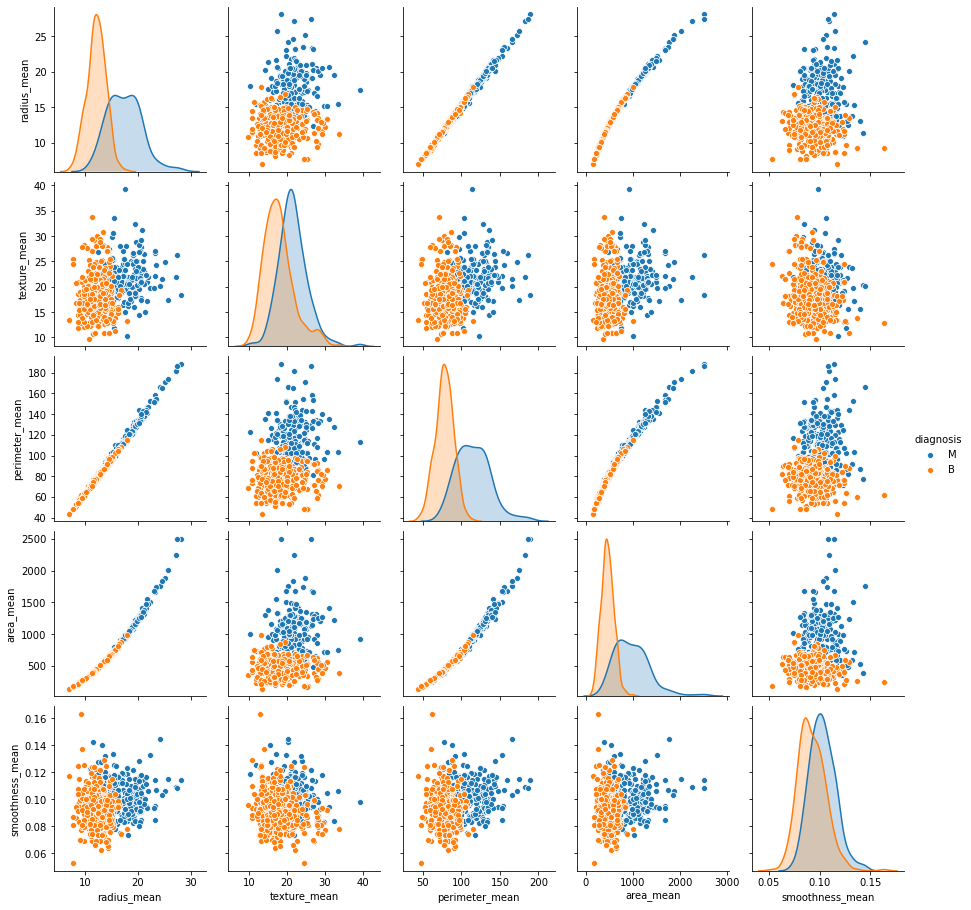

In [15]:
dados_limpos_mean_1 = dados_limpos.loc[:,['diagnosis', 'radius_mean','texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']]
sns.pairplot(dados_limpos_mean_1, hue="diagnosis")
plt.show()

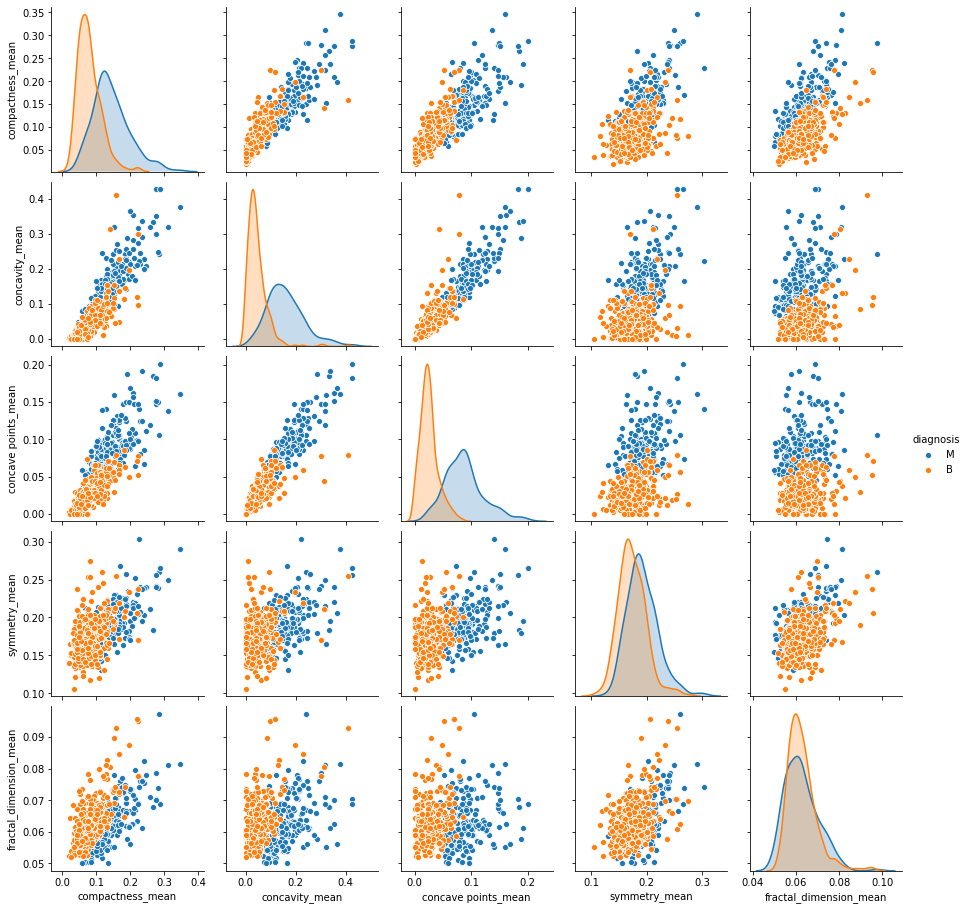

In [16]:
dados_limpos_mean_2 = dados_limpos.loc[:,['diagnosis',  'compactness_mean','concavity_mean','concave points_mean','symmetry_mean', 'fractal_dimension_mean']]
sns.pairplot(dados_limpos_mean_2, hue="diagnosis")
plt.show()

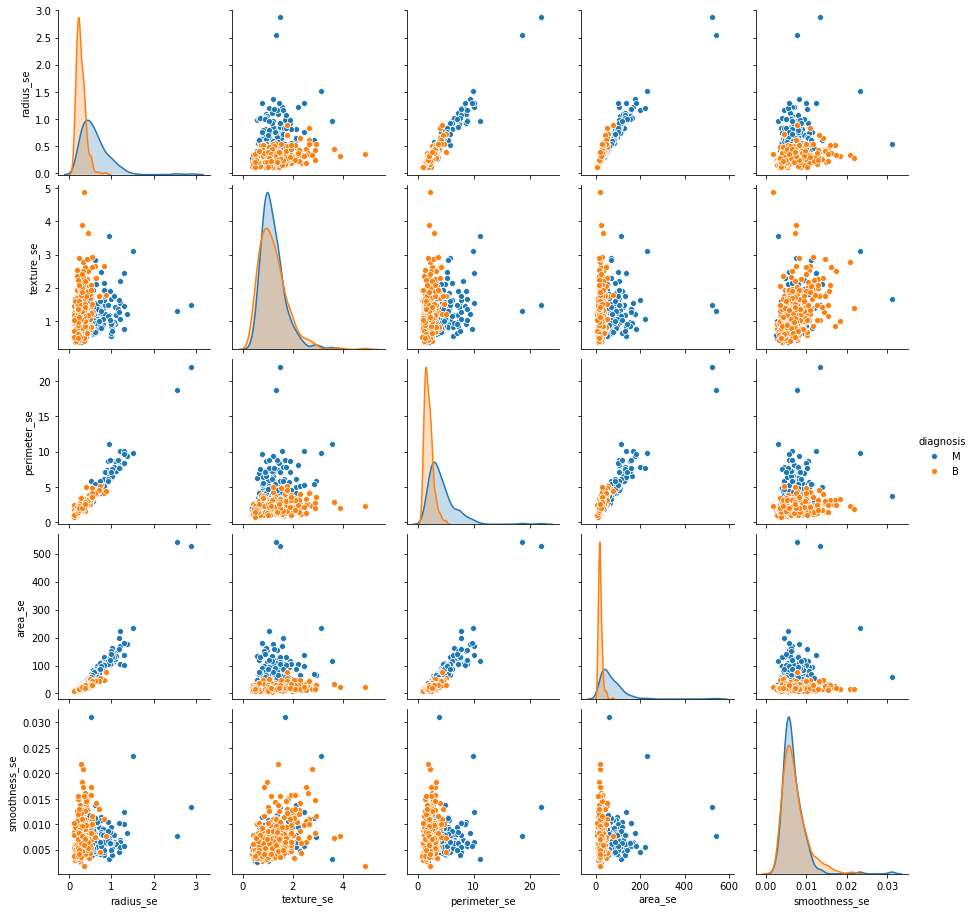

In [17]:
dados_limpos_desvio_1 = dados_limpos.loc[:,['diagnosis', 'radius_se','texture_se', 'perimeter_se', 'area_se', 'smoothness_se']]
sns.pairplot(dados_limpos_desvio_1, hue="diagnosis")
plt.show()

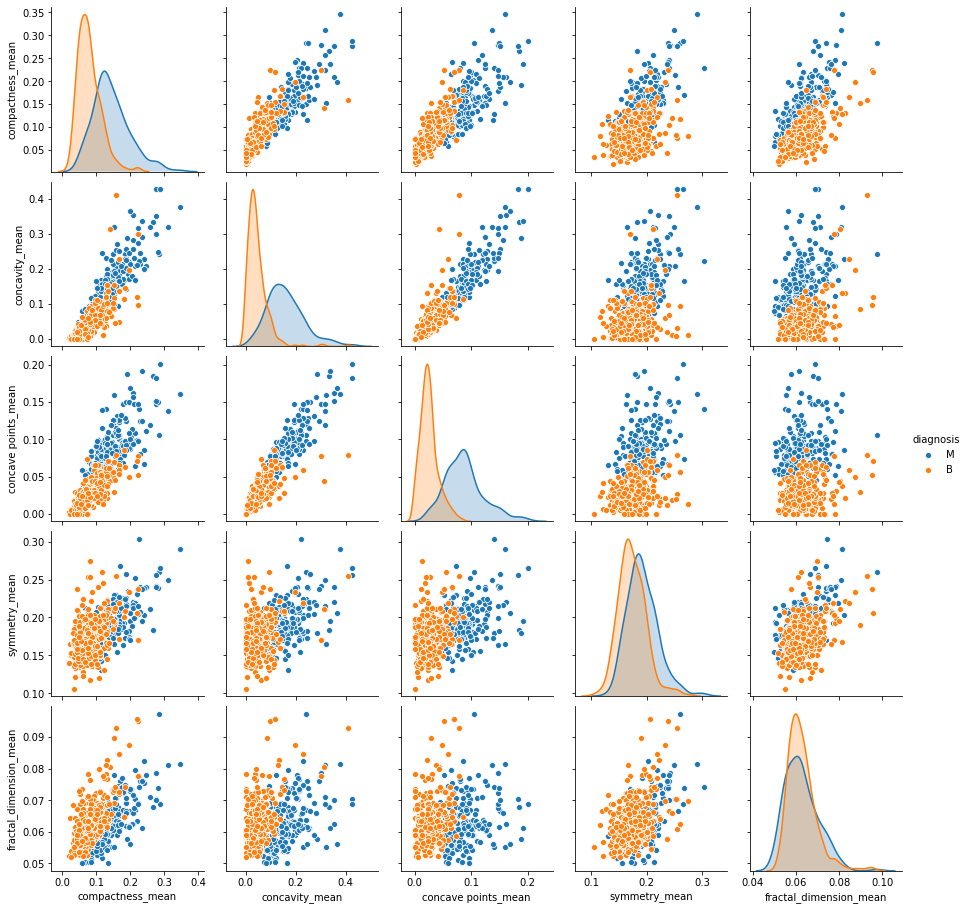

In [18]:
dados_limpos_desvio_2 = dados_limpos.loc[:,['diagnosis', 'compactness_mean','concavity_mean','concave points_mean','symmetry_mean', 'fractal_dimension_mean']]
sns.pairplot(dados_limpos_desvio_2, hue="diagnosis")
plt.show()

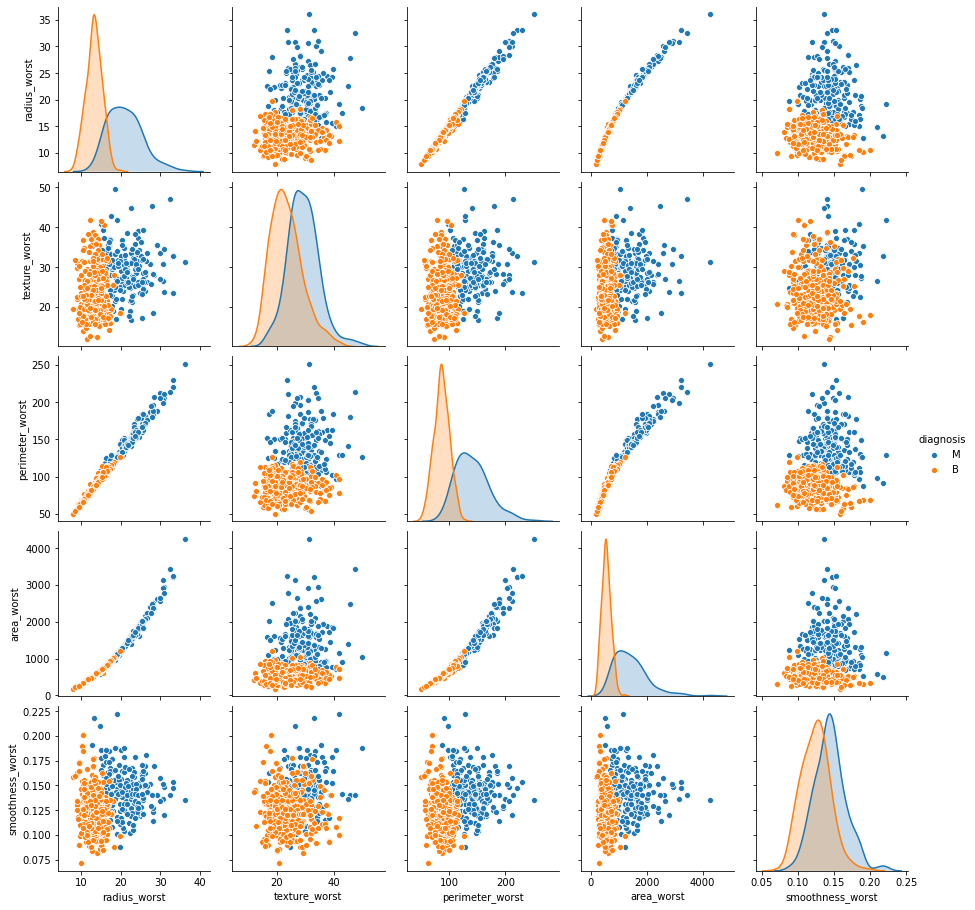

In [19]:
dados_limpos_pior_1 = dados_limpos.loc[:,['diagnosis', 'radius_worst','texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst']]
sns.pairplot(dados_limpos_pior_1, hue="diagnosis")
plt.show()

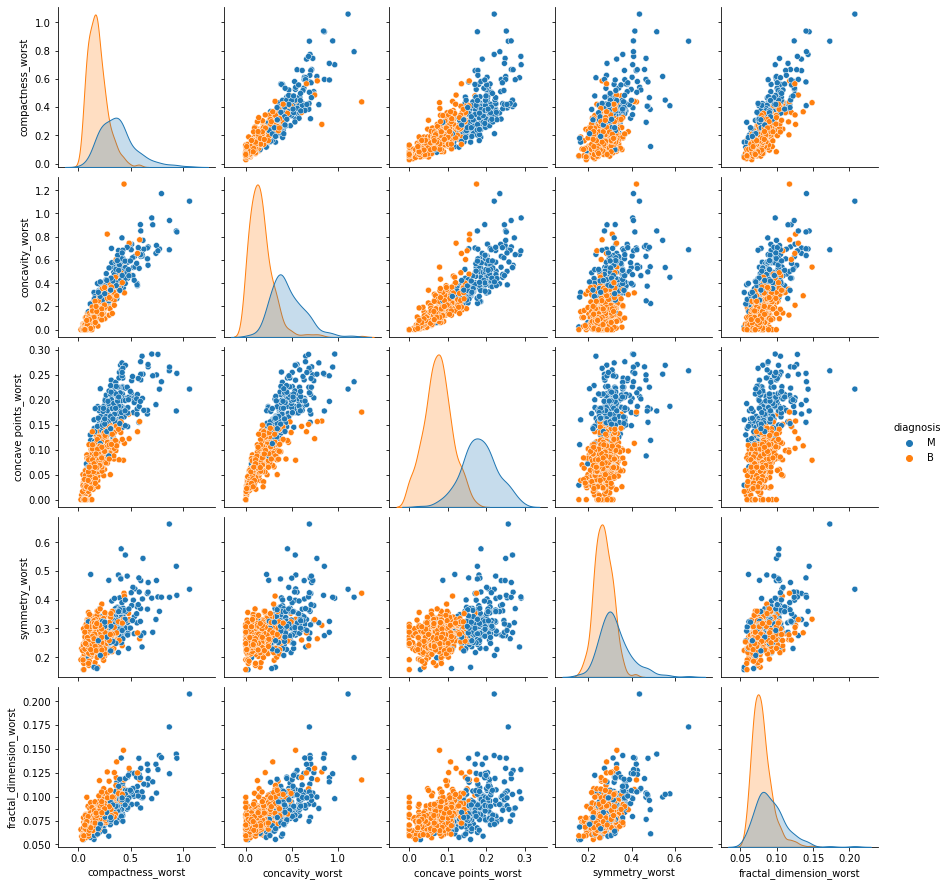

In [331]:
dados_limpos_pior_2 = dados_limpos.loc[:,['diagnosis', 'compactness_worst','concavity_worst','concave points_worst','symmetry_worst', 'fractal_dimension_worst']]
sns.pairplot(dados_limpos_pior_2, hue="diagnosis")
plt.show()

## Modelos de Predição

### Melhorando e separando os dados para serem usados nas Técnicas de Previsão
<div id="tec"></div>

Nesse sentido, é preciso criar um dataframe apenas com as features, pois são os dados que vão ser observados para definir se é Benigno ou Maligno o tumor. Dessa forma, é criado uma nova base de dados sem os diagnósticos, chamada dados explicativos.

In [278]:
dados = pd.read_csv(filename) #colocado aqui apenas para não dar erro caso rodar essa célula de novo
del dados['diagnosis']
del dados['Unnamed: 32']
del dados['id']
dados_explicativos = dados
dados_explicativos

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Ademais, para obter uma previsão mais precisa, é necessário que ocorra uma padronização dos dados. Grande parte dos estimadores de machine learning do scikit-learn podem ter uma aficácia menor quando não é utilizado dados que estejam parecidos com o formato de média zero e variância, pois os modelos scikit-learn já são produzidos levando em conta que será usado dados que estejam próximos do modelo de distribuição normal padronizada.  

In [279]:
dados_explicativos_ajustados = StandardScaler().fit_transform(dados_explicativos)

resultados_ajustados = LabelEncoder().fit_transform(dados_limpos.diagnosis)

Também é possível, por meio da tabela abaixo, confirmar, na padronização feita acima, o que é dado como Benigno se transforma no número 0 e o que é Maligno se torna 1.

In [280]:
resultados_em_B_e_M = pd.Series(dados_limpos.diagnosis).array
df = pd.DataFrame()
df['resultado em B e M'] = resultados_em_B_e_M
df['resultado em 0 e 1'] = resultados_ajustados
df

,resultado em B e M,resultado em 0 e 1
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1
...,...,...
564,M,1
565,M,1
566,M,1
567,M,1


Antes de começar com as técnicas, também é necessário separar a base de dados entre treinamento e teste, pois é necessário treinar o classificador primeiro e depois fazer o teste, e fazer a comparação dos valores previstos com os reais.

In [281]:
X_train, X_test, y_train, y_test = train_test_split(dados_explicativos_ajustados, resultados_ajustados, test_size = 0.3, random_state=42)
f'Tamanho do dataframe de treinamento = {len(X_train)} e tamanho do dataframe de teste = {len(X_test)}'

'Tamanho do dataframe de treinamento = 398 e tamanho do dataframe de teste = 171'

### Primeira Técnica de Classificação - Método da Regressão Logística


In [282]:
classificador_logistico = LogisticRegression()

In [283]:
classificador_logistico.fit(X_train,y_train)

LogisticRegression()

In [284]:
ypred = classificador_logistico.predict(X_test)
ypred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

Para observar se o modelo está coerente, é possível fazer uma tabela estilo crosstab, a qual cruza os valores que deram iguais e os que não deram, sendo uma boa forma de observação. Vale lembrar que o número 0 representa o resultado B (Benigno) e 1 representa M (Maligno), conforme já confirmado no item [Melhorando e separando os dados para serem usados nas Técnicas de Previsão](#tec).


In [285]:
pd.crosstab(y_test, y_pred,rownames=['Resultado Correto'], colnames=['Resultado Previsto'], normalize = False).round(4)

Resultado Previsto,0,1
Resultado Correto,,
0,106,2
1,1,62


In [21]:
#Precisão da 1° técnica
classificador_logistico.score(X_test, y_test)

NameError: name 'classificador_logistico' is not defined

In [22]:
#Relatório da  1° técnica
print(classification_report(y_test, ypred))

NameError: name 'y_test' is not defined

In [296]:
df_com_resultados = pd.DataFrame()
df_com_resultados['Resultado Correto'] = y_test
df_com_resultados['Resultado Previsto'] = ypred

In [297]:
df_com_resultados['Resultado Correto'] = df_com_resultados['Resultado Correto'].astype('category')
df_com_resultados['Resultado Correto'].cat.categories = ['Benigno', 'Maligno']
df_com_resultados['Resultado Correto'].cat.categories

Index(['Benigno', 'Maligno'], dtype='object')

In [298]:
df_com_resultados['Resultado Previsto'] = df_com_resultados['Resultado Previsto'].astype('category')
df_com_resultados['Resultado Previsto'].cat.categories = ['Benigno', 'Maligno']
df_com_resultados['Resultado Previsto'].cat.categories

Index(['Benigno', 'Maligno'], dtype='object')

In [300]:
pd.crosstab(df_com_resultados['Resultado Correto'] , df_com_resultados['Resultado Previsto'],rownames=['Resultado Correto'], colnames=['Resultado Previsto'], normalize = True).round(4)

Resultado Previsto,Benigno,Maligno
Resultado Correto,,
Benigno,0.6199,0.0117
Maligno,0.0058,0.3626


### Segunda Técnica de Classificação - Método da Árvore de Decisão


In [241]:
X_train.shape,X_test.shape

((398, 30), (171, 30))

In [242]:
y_train.shape,y_test.shape

((398,), (171,))

In [243]:
classificador_decisao = DecisionTreeClassifier()
classificador_decisao = classificador_decisao.fit(X_train,y_train)

In [244]:
ypred2 = classificador_decisao.predict(X_test)
ypred2

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [245]:
print(classification_report(y_test,ypred2))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       108
           1       0.86      0.94      0.89        63

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171



In [246]:
classificador_decisao.score(X_test, y_test)

0.9181286549707602

In [255]:
pd.crosstab(y_test, ypred2,rownames=['Resultado Correto'], colnames=['Resultado Previsto'], normalize = True).round(4)

Resultado Previsto,0,1
Resultado Correto,,
0,0.5731,0.0585
1,0.0234,0.3450


### Terceira Técnica de Classificação - Método da Floresta Aleatória

In [248]:
classificador_aleatorio = RandomForestClassifier(n_estimators=1000)

In [249]:
classificador_aleatorio.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [250]:
ypred3 = classificador_aleatorio.predict(X_test)
ypred3

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [251]:
print(classification_report(y_test,ypred3))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [252]:
classificador_aleatorio.score(X_test, y_test)

0.9707602339181286

In [254]:
pd.crosstab(y_test, ypred3,rownames=['Resultado Correto'], colnames=['Resultado Previsto'], normalize = True).round(4)

Resultado Previsto,0,1
Resultado Correto,,
0,0.6257,0.0058
1,0.0234,0.3450


# Processo e Estatísticas de Validação

    Depois de escolhido um modelo, é necessário verificar se os resultados obtidos foram bons o suficiente. Para avaliar isso é preciso conhecer um pouco sobre erros comuns que acontecem ao desenvolver os algoritmos, como identificá-los e corrigi-los. Pensando nisso, *************** 
    

# Referências Bibliográficas

1. http://antigo.saude.gov.br/saude-de-a-z/cancer-de-mama

2. https://clinicadamama.com.br/cancer-de-mama-maligno-e-benigno/

3. https://estatsite.com.br/2020/09/23/regressao-logistica-em-python/

4. https://scikit-learn.org/stable/modules/preprocessing.html

5. https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

6. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.array.html

7. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

8. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

9. https://minerandodados.com.br/arvores-de-decisao-conceitos-e-aplicacoes/

10. http://seaborn.pydata.org/generated/seaborn.pairplot.html

IGNORAR
CÉLULA DE REFERENCIA

### Contribuidores
### Indice
### Objetivo do projeto

### A. Introdução 
   - contexto na realidade do projeto 
   - Descrição do projeto escolhido
parâmetro de textura perímetro área entre outros 
classificar se é maligno ou benigno 
    - Bibliotecas
### B. Minerando Dados e Características do Dataset 
    colocar funcao das bibliotecas, de onde foi retirado dataset e descrever ele
### C. Modelos de Predição
### D. Processo e Estatísticas de Validação
### E. Conclusão 
### F. Referências Bibliográficas 

**é necessário 
explicar o que cada modelo de predição faz e também explicar como 
funciona a biblioteca escolhida